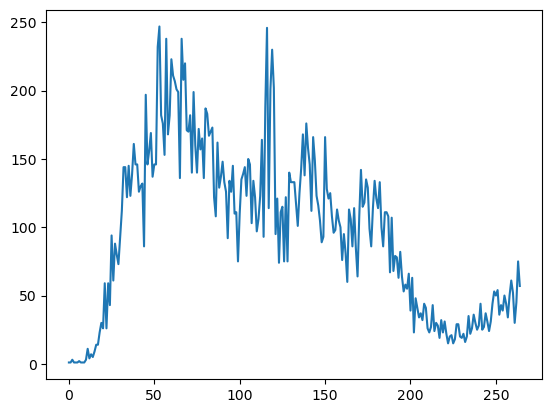

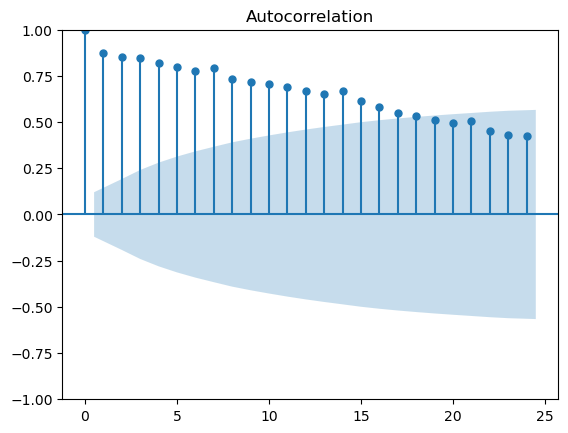

D:\88690\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


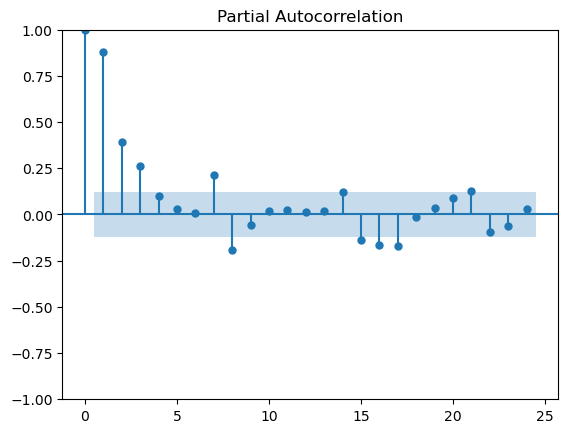

In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
from tensorflow import keras
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import SimpleRNN
from tensorflow.keras.layers import LeakyReLU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# LSTM with regression framing
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from keras import optimizers
dataset = pandas.read_csv(r'各縣市每日確診資料\澎湖縣每日確診數.csv', usecols=[2], engine='python', skipfooter=3,encoding='utf-8')
plt.plot(dataset)
plt.savefig('Penghu.png')
plt.show()

# 畫出 ACF 12 期的效應
sm.graphics.tsa.plot_acf(dataset, lags=24)
plt.savefig('Penghu_acf_24.png')
plt.show()
# 畫出 PACF 12 期的效應
sm.graphics.tsa.plot_pacf(dataset, lags=24)
plt.savefig('Penghu_pacf_24.png')
plt.show()

In [2]:
# 產生 (X, Y) 資料集, Y 是下一期的感染人數
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

# 載入訓練資料
dataframe = read_csv(r'各縣市每日確診資料\澎湖縣每日確診數.csv', usecols=[2], engine='python', skipfooter=0,encoding='utf-8')
dataframe=dataframe.drop(dataframe[dataframe['確定病例數']==0].index,axis=0)
print(dataframe)
#plt.plot(dataframe)

dataset = dataframe.values
print(len(dataset))
#dataset=np.delete(dataset,[0,768],axis=0)

# 正規化(normalize) 資料，使資料值介於[0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

     確定病例數
0        1
1        1
2        3
3        1
4        1
..     ...
261     30
262     45
263     75
264     57
265     56

[266 rows x 1 columns]
266


## RNN結合LSTM架構

### Model1

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1, 64)             4224      
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 37,313
Trainable params: 37,313
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
24/24 [==============================] - 4s 39ms/step - loss: 0.1914 - mse: 0.1914 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 2/1000
24/24 [==============================] - 0s 5ms/step - loss: 0.0966 - mse: 0.0966 - val_loss: 0.0140 - val_mse: 0.0140
Epoch 3/1000
24/24 [==============================]

24/24 [==============================] - 0s 8ms/step - loss: 0.0289 - mse: 0.0289 - val_loss: 0.0233 - val_mse: 0.0233
Epoch 57/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0286 - mse: 0.0286 - val_loss: 0.0225 - val_mse: 0.0225
Epoch 58/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0282 - mse: 0.0282 - val_loss: 0.0222 - val_mse: 0.0222
Epoch 59/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0278 - mse: 0.0278 - val_loss: 0.0215 - val_mse: 0.0215
Epoch 60/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0275 - mse: 0.0275 - val_loss: 0.0212 - val_mse: 0.0212
Epoch 61/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0272 - mse: 0.0272 - val_loss: 0.0210 - val_mse: 0.0210
Epoch 62/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0268 - mse: 0.0268 - val_loss: 0.0201 - val_mse: 0.0201
Epoch 63/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0265 -

24/24 [==============================] - 0s 7ms/step - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 118/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 119/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 120/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 121/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 122/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 123/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 124/1000
24/24 [==============================] - 0s 7ms/step - loss: 0

24/24 [==============================] - 0s 7ms/step - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 179/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 180/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 181/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 182/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 183/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 184/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 185/1000
24/24 [==============================] - 0s 7ms/step - loss: 0

24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 240/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 241/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 242/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 243/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 244/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 245/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 246/1000
24/24 [==============================] - 0s 7ms/step - loss: 0

24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 301/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 302/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 303/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 304/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 305/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 306/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 307/1000
24/24 [==============================] - 0s 7ms/step - loss: 0

24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 362/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 363/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 364/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 365/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 366/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 367/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 368/1000
24/24 [==============================] - 0s 7ms/step - loss: 0

24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 423/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 424/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 425/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 426/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 427/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 428/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 429/1000
24/24 [==============================] - 0s 7ms/step - loss: 0

24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 484/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 485/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 486/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 487/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 488/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 489/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 490/1000
24/24 [==============================] - 0s 7ms/step - loss: 0

24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 545/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 546/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 547/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 548/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 549/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 550/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 551/1000
24/24 [==============================] - 0s 7ms/step - loss: 0

24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 606/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 607/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 608/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 609/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 610/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 611/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 612/1000
24/24 [==============================] - 0s 7ms/step - loss: 0

24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 667/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 668/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 669/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 670/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 671/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 672/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 673/1000
24/24 [==============================] - 0s 7ms/step - loss: 0

24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 728/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 729/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 730/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 731/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 732/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 733/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 734/1000
24/24 [==============================] - 0s 7ms/step - loss: 0

24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 789/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 790/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 791/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 792/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 793/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 794/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 795/1000
24/24 [==============================] - 0s 7ms/step - loss: 0

24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 850/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 851/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 852/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 853/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 854/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 855/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 856/1000
24/24 [==============================] - 0s 7ms/step - loss: 0

24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 911/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 912/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 913/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 914/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 915/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 916/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 917/1000
24/24 [==============================] - 0s 7ms/step - loss: 0

24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 972/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 973/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 974/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 975/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 976/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 977/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 978/1000
24/24 [==============================] - 0s 7ms/step - loss: 0

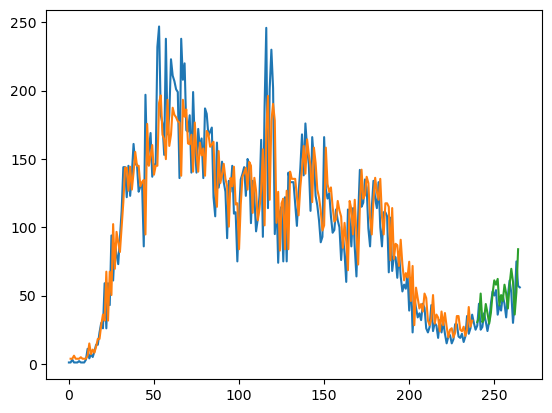

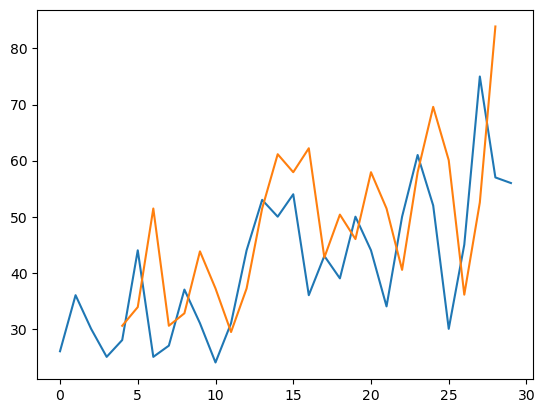

In [3]:
tf.random.set_seed(7)

# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 產生 (X, Y) 資料集, Y 是下一期的確診數(reshape into X=t and Y=t+1)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# 建立及訓練 GRU 模型
model = Sequential([
    SimpleRNN(64, return_sequences=True, input_shape=(1, look_back)),
    LSTM(64, activation='tanh'),
    Dense(1, activation='tanh')
])

#model.compile(loss='categorical_crossentropy', optimizer=opt)
#opt = keras.optimizers.Adam(learning_rate=0.0001)
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd ,metrics=['mse'])


model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="penghu_rnn+lstm_1000_1.keras",
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

model.summary()
history = model.fit(trainX, trainY,validation_data=(testX, testY), epochs=1000, batch_size=10, verbose=1,callbacks=[model_checkpoint_callback])
model.save('penghu_rnn+lstm_1000_1.h5')
# 預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
#看裡面的值是否合理、資料結構的dim
print(trainPredict,trainY)
print(testPredict,testY)

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#model = keras.models.load_model("jena_lstm.keras")
#print(f"Test MAE: {model.evaluate(testPredict)[1]:.2f}")

# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# 畫原始資料趨勢圖8
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('penghu_rnn+lstm_1000_plot_1.png') 
plt.show()
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
days=len(testPredictPlot)
plt.plot(scaler.inverse_transform(dataset[days-30:,:]))
plt.plot(testPredictPlot[days-30:,:])
plt.savefig("penghu_rnn+lstm_1000_predict&real_1.png")
plt.show()

### Model2

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 1, 128)            16640     
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 148,353
Trainable params: 148,353
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
24/24 [==============================] - 4s 44ms/step - loss: 0.1787 - mse: 0.1787 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 2/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0922 - mse: 0.0922 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 3/1000
24/24 [===========================

24/24 [==============================] - 0s 8ms/step - loss: 0.0288 - mse: 0.0288 - val_loss: 0.0232 - val_mse: 0.0232
Epoch 57/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0285 - mse: 0.0285 - val_loss: 0.0224 - val_mse: 0.0224
Epoch 58/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0281 - mse: 0.0281 - val_loss: 0.0222 - val_mse: 0.0222
Epoch 59/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0278 - mse: 0.0278 - val_loss: 0.0215 - val_mse: 0.0215
Epoch 60/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0275 - mse: 0.0275 - val_loss: 0.0212 - val_mse: 0.0212
Epoch 61/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0271 - mse: 0.0271 - val_loss: 0.0209 - val_mse: 0.0209
Epoch 62/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0268 - mse: 0.0268 - val_loss: 0.0201 - val_mse: 0.0201
Epoch 63/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0265 -

24/24 [==============================] - 0s 8ms/step - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 118/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 119/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 120/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 121/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 122/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 123/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 124/1000
24/24 [==============================] - 0s 8ms/step - loss: 0

24/24 [==============================] - 0s 8ms/step - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 179/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 180/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 181/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 182/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 183/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 184/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 185/1000
24/24 [==============================] - 0s 8ms/step - loss: 0

24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 240/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 241/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 242/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 243/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 244/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 245/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 246/1000
24/24 [==============================] - 0s 8ms/step - loss: 0

24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 301/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 302/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 303/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 304/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 305/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 306/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 307/1000
24/24 [==============================] - 0s 8ms/step - loss: 0

24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 362/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 363/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 364/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 365/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 366/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 367/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 368/1000
24/24 [==============================] - 0s 8ms/step - loss: 0

24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 423/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 424/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 425/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 426/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 427/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 428/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 429/1000
24/24 [==============================] - 0s 8ms/step - loss: 0

24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 484/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 485/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 486/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 487/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 488/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 489/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 490/1000
24/24 [==============================] - 0s 8ms/step - loss: 0

24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 545/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 546/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 547/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 548/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 549/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 550/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 551/1000
24/24 [==============================] - 0s 8ms/step - loss: 0

24/24 [==============================] - 0s 9ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 606/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 607/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 608/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 609/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 610/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 611/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 612/1000
24/24 [==============================] - 0s 8ms/step - loss: 0

24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 667/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 668/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 669/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 670/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 671/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 672/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 673/1000
24/24 [==============================] - 0s 8ms/step - loss: 0

24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 728/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 729/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 730/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 731/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 732/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 733/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 734/1000
24/24 [==============================] - 0s 8ms/step - loss: 0

24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 789/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 790/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 791/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 792/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 793/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 794/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 795/1000
24/24 [==============================] - 0s 8ms/step - loss: 0

24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 850/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 851/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 852/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 853/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 854/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 855/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 856/1000
24/24 [==============================] - 0s 9ms/step - loss: 0

24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 911/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 912/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 913/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 914/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 915/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 916/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 917/1000
24/24 [==============================] - 0s 8ms/step - loss: 0

24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 972/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 973/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 974/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 975/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 976/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 977/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 978/1000
24/24 [==============================] - 0s 8ms/step - loss: 0

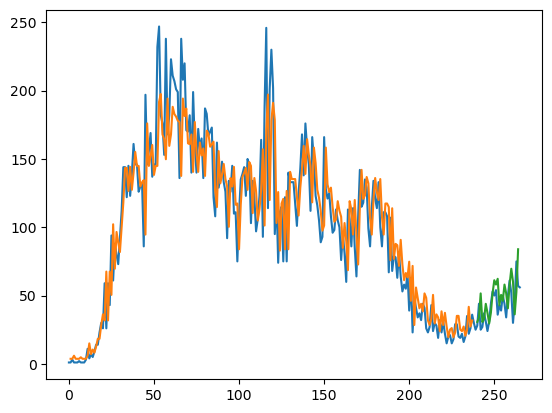

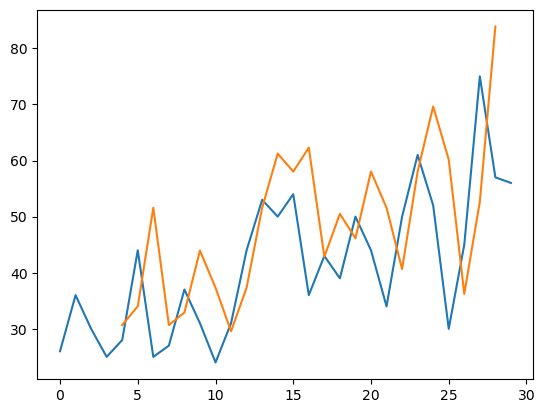

In [4]:
tf.random.set_seed(7)

# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 產生 (X, Y) 資料集, Y 是下一期的確診數(reshape into X=t and Y=t+1)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# 建立及訓練 GRU 模型
model = Sequential([
    SimpleRNN(128, return_sequences=True, input_shape=(1, look_back)),
    LSTM(128, activation='tanh'),
    Dense(1, activation='tanh')
])

#model.compile(loss='categorical_crossentropy', optimizer=opt)
#opt = keras.optimizers.Adam(learning_rate=0.0001)
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd ,metrics=['mse'])


model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="penghu_rnn+lstm_1000_2.keras",
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

model.summary()
history = model.fit(trainX, trainY,validation_data=(testX, testY), epochs=1000, batch_size=10, verbose=1,callbacks=[model_checkpoint_callback])
model.save('penghu_rnn+lstm_1000_2.h5')
# 預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#model = keras.models.load_model("jena_lstm.keras")
#print(f"Test MAE: {model.evaluate(testPredict)[1]:.2f}")

# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# 畫原始資料趨勢圖8
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('penghu_rnn+lstm_1000_plot_2.png') 
plt.show()
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
days=len(testPredictPlot)
plt.plot(scaler.inverse_transform(dataset[days-30:,:]))
plt.plot(testPredictPlot[days-30:,:])
plt.savefig("penghu_rnn+lstm_1000_predict&real_2.png")
plt.show()

### Model3

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 1, 64)             4224      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 1, 64)             8256      
                                                                 
 dense_2 (Dense)             (None, 1, 64)             4160      
                                                                 
 lstm_2 (LSTM)               (None, 1, 64)             33024     
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 82,753
Trainable params: 82,753
Non-trai

24/24 [==============================] - 0s 9ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 54/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 55/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 56/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 57/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 58/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 59/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 60/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0142 -

24/24 [==============================] - 0s 16ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 115/1000
24/24 [==============================] - 0s 16ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 116/1000
24/24 [==============================] - 0s 15ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 117/1000
24/24 [==============================] - 0s 15ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 118/1000
24/24 [==============================] - 0s 14ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 119/1000
24/24 [==============================] - 0s 16ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 120/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 121/1000
24/24 [==============================] - 0s 18ms/step - 

Epoch 175/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 176/1000
24/24 [==============================] - 0s 15ms/step - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 177/1000
24/24 [==============================] - 0s 18ms/step - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 178/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 179/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 180/1000
24/24 [==============================] - 0s 14ms/step - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 181/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 182/1000
24/24 [==============================] - 0s 

24/24 [==============================] - 0s 17ms/step - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 237/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 238/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 239/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 240/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 241/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 242/1000
24/24 [==============================] - 0s 19ms/step - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 243/1000
24/24 [==============================] - 0s 8ms/step - loss:

24/24 [==============================] - 0s 9ms/step - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 298/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 299/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 300/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 301/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 302/1000
24/24 [==============================] - 0s 16ms/step - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 303/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 304/1000
24/24 [==============================] - 0s 8ms/step - loss: 

24/24 [==============================] - 0s 9ms/step - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 359/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 360/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 361/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 362/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 363/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 364/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 365/1000
24/24 [==============================] - 0s 9ms/step - loss: 0

24/24 [==============================] - 0s 8ms/step - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 420/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 421/1000
24/24 [==============================] - 0s 12ms/step - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 422/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 423/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 424/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 425/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 426/1000
24/24 [==============================] - 0s 9ms/step - loss: 

24/24 [==============================] - 0s 8ms/step - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 481/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 482/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 483/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 484/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 485/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 486/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 487/1000
24/24 [==============================] - 0s 9ms/step - loss: 0

24/24 [==============================] - 0s 9ms/step - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 542/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 543/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 544/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 545/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 546/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 547/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 548/1000
24/24 [==============================] - 0s 9ms/step - loss: 0

24/24 [==============================] - 0s 10ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 603/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 604/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 605/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 606/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 607/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 608/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 609/1000
24/24 [==============================] - 0s 8ms/step - loss: 

24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 664/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 665/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 666/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 667/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 668/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 669/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 670/1000
24/24 [==============================] - 0s 8ms/step - loss: 0

24/24 [==============================] - 0s 9ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 725/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 726/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 727/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 728/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 729/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 730/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 731/1000
24/24 [==============================] - 0s 9ms/step - loss: 0

24/24 [==============================] - 0s 9ms/step - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 786/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 787/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 788/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 789/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 790/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 791/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 792/1000
24/24 [==============================] - 0s 8ms/step - loss: 

24/24 [==============================] - 0s 9ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 847/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 848/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 849/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 850/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 851/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 852/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 853/1000
24/24 [==============================] - 0s 9ms/step - loss: 0

24/24 [==============================] - 0s 9ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 908/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 909/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 910/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 911/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 912/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 913/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 914/1000
24/24 [==============================] - 0s 9ms/step - loss: 0

24/24 [==============================] - 0s 9ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 969/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 970/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 971/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 972/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 973/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 974/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 975/1000
24/24 [==============================] - 0s 9ms/step - loss: 0

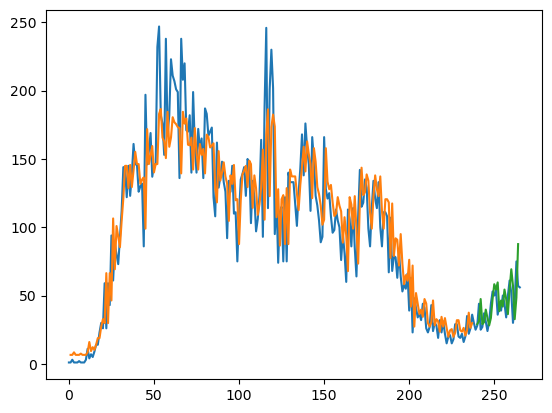

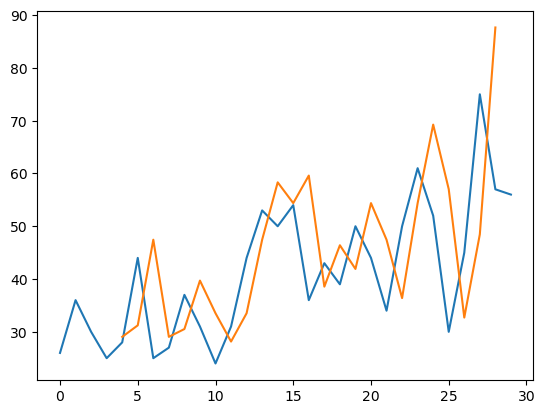

In [5]:
from tensorflow.keras.layers import Flatten,Reshape
tf.random.set_seed(7)

# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 產生 (X, Y) 資料集, Y 是下一期的確診數(reshape into X=t and Y=t+1)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# 建立及訓練 GRU 模型
model = Sequential([
    SimpleRNN(64, return_sequences=True, input_shape=(1, look_back)),
    SimpleRNN(64, return_sequences=True, activation='selu'),
    Dense(64, activation='selu'),
    LSTM(64, return_sequences=True, activation='selu'),
    LSTM(64, return_sequences=False, activation='selu'),
    Dense(1, activation='tanh')
])

model.output_shape
#model.compile(loss='categorical_crossentropy', optimizer=opt)
#opt = keras.optimizers.Adam(learning_rate=0.0001)
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd ,metrics=['mse'])


model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="penghu_rnn+lstm_1000_3.keras",
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

model.summary()
history = model.fit(trainX, trainY,validation_data=(testX, testY), epochs=1000, batch_size=10, verbose=1,callbacks=[model_checkpoint_callback])
model.save('penghu_rnn+lstm_1000_3.h5')
# 預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict=trainPredict.reshape(-1, 1)
testPredict=testPredict.reshape(-1, 1)

# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#model = keras.models.load_model("jena_lstm.keras")
#print(f"Test MAE: {model.evaluate(testPredict)[1]:.2f}")

# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# 畫原始資料趨勢圖8
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('penghu_rnn+lstm_1000_plot_3.png') 
plt.show()

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
days=len(testPredictPlot)
plt.plot(scaler.inverse_transform(dataset[days-30:,:]))
plt.plot(testPredictPlot[days-30:,:])
plt.savefig("penghu_rnn+lstm_1000_predict&real_3.png")
plt.show()

### Model4

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 1, 64)             4224      
                                                                 
 dense_4 (Dense)             (None, 1, 4)              260       
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 1, 64)             4416      
                                                                 
 dense_5 (Dense)             (None, 1, 1)              65        
                                                                 
 lstm_4 (LSTM)               (None, 1, 64)             16896     
                                                                 
 dense_6 (Dense)             (None, 1, 4)              260       
                                                                 
 lstm_5 (LSTM)               (None, 1, 64)            

Epoch 51/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0594 - mse: 0.0594 - val_loss: 0.0690 - val_mse: 0.0690
Epoch 52/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0595 - mse: 0.0595 - val_loss: 0.0670 - val_mse: 0.0670
Epoch 53/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0596 - mse: 0.0596 - val_loss: 0.0625 - val_mse: 0.0625
Epoch 54/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0593 - mse: 0.0593 - val_loss: 0.0638 - val_mse: 0.0638
Epoch 55/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0582 - mse: 0.0582 - val_loss: 0.0786 - val_mse: 0.0786
Epoch 56/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0594 - mse: 0.0594 - val_loss: 0.0533 - val_mse: 0.0533
Epoch 57/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0590 - mse: 0.0590 - val_loss: 0.0692 - val_mse: 0.0692
Epoch 58/1000
237/237 [==============================] 

237/237 [==============================] - 1s 6ms/step - loss: 0.0235 - mse: 0.0235 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 112/1000
237/237 [==============================] - 2s 6ms/step - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 113/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 114/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0225 - mse: 0.0225 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 115/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0227 - mse: 0.0227 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 116/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0201 - mse: 0.0201 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 117/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0237 - mse: 0.0237 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 118/1000
237/237 [==============================] - 1s 6m

237/237 [==============================] - 1s 6ms/step - loss: 0.0229 - mse: 0.0229 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 172/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 173/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 174/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0212 - mse: 0.0212 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 175/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0215 - mse: 0.0215 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 176/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0216 - mse: 0.0216 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 177/1000
237/237 [==============================] - 1s 5ms/step - loss: 0.0228 - mse: 0.0228 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 178/1000
237/237 [==============================] - 1s 6m

237/237 [==============================] - 1s 6ms/step - loss: 0.0223 - mse: 0.0223 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 232/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0208 - mse: 0.0208 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 233/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 234/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0209 - mse: 0.0209 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 235/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 236/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0228 - mse: 0.0228 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 237/1000
237/237 [==============================] - 1s 5ms/step - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 238/1000
237/237 [==============================] - 1s 6m

237/237 [==============================] - 1s 6ms/step - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 292/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 293/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 294/1000
237/237 [==============================] - 1s 5ms/step - loss: 0.0194 - mse: 0.0194 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 295/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 296/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0216 - mse: 0.0216 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 297/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 298/1000
237/237 [==============================] - 1s 6m

237/237 [==============================] - 1s 6ms/step - loss: 0.0227 - mse: 0.0227 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 352/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0200 - mse: 0.0200 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 353/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0199 - mse: 0.0199 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 354/1000
237/237 [==============================] - 1s 5ms/step - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 355/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 356/1000
237/237 [==============================] - 1s 5ms/step - loss: 0.0194 - mse: 0.0194 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 357/1000
237/237 [==============================] - 1s 5ms/step - loss: 0.0231 - mse: 0.0231 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 358/1000
237/237 [==============================] - 1s 6m

237/237 [==============================] - 1s 6ms/step - loss: 0.0208 - mse: 0.0208 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 412/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 413/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0211 - mse: 0.0211 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 414/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0199 - mse: 0.0199 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 415/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 416/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0201 - mse: 0.0201 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 417/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0200 - mse: 0.0200 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 418/1000
237/237 [==============================] - 1s 6m

237/237 [==============================] - 1s 6ms/step - loss: 0.0214 - mse: 0.0214 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 472/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0217 - mse: 0.0217 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 473/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 474/1000
237/237 [==============================] - 1s 5ms/step - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 475/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 476/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 477/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 478/1000
237/237 [==============================] - 1s 6m

237/237 [==============================] - 1s 6ms/step - loss: 0.0207 - mse: 0.0207 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 532/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 533/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0208 - mse: 0.0208 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 534/1000
237/237 [==============================] - 1s 5ms/step - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 535/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 536/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0220 - mse: 0.0220 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 537/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 538/1000
237/237 [==============================] - 1s 6m

237/237 [==============================] - 1s 6ms/step - loss: 0.0209 - mse: 0.0209 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 592/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 593/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 594/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 595/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0209 - mse: 0.0209 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 596/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0191 - mse: 0.0191 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 597/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 598/1000
237/237 [==============================] - 1s 6m

237/237 [==============================] - 1s 5ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 652/1000
237/237 [==============================] - 1s 5ms/step - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 653/1000
237/237 [==============================] - 1s 5ms/step - loss: 0.0199 - mse: 0.0199 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 654/1000
237/237 [==============================] - 1s 5ms/step - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0092 - val_mse: 0.0092
Epoch 655/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 656/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 657/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 658/1000
237/237 [==============================] - 1s 6m

237/237 [==============================] - 2s 7ms/step - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 712/1000
237/237 [==============================] - 2s 7ms/step - loss: 0.0208 - mse: 0.0208 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 713/1000
237/237 [==============================] - 2s 7ms/step - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 714/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0209 - mse: 0.0209 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 715/1000
237/237 [==============================] - 2s 7ms/step - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 716/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 717/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 718/1000
237/237 [==============================] - 2s 8m

237/237 [==============================] - 1s 6ms/step - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 772/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0199 - mse: 0.0199 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 773/1000
237/237 [==============================] - 1s 5ms/step - loss: 0.0194 - mse: 0.0194 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 774/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0191 - mse: 0.0191 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 775/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 776/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0215 - mse: 0.0215 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 777/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0227 - mse: 0.0227 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 778/1000
237/237 [==============================] - 1s 6m

237/237 [==============================] - 1s 6ms/step - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 832/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 833/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 834/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 835/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 836/1000
237/237 [==============================] - 1s 5ms/step - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 837/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 838/1000
237/237 [==============================] - 1s 6m

237/237 [==============================] - 1s 6ms/step - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 892/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0216 - mse: 0.0216 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 893/1000
237/237 [==============================] - 1s 5ms/step - loss: 0.0209 - mse: 0.0209 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 894/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 895/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 896/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 897/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 898/1000
237/237 [==============================] - 1s 6m

237/237 [==============================] - 1s 6ms/step - loss: 0.0237 - mse: 0.0237 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 952/1000
237/237 [==============================] - 1s 5ms/step - loss: 0.0237 - mse: 0.0237 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 953/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 954/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 955/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0205 - mse: 0.0205 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 956/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 957/1000
237/237 [==============================] - 1s 6ms/step - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 958/1000
237/237 [==============================] - 1s 6m

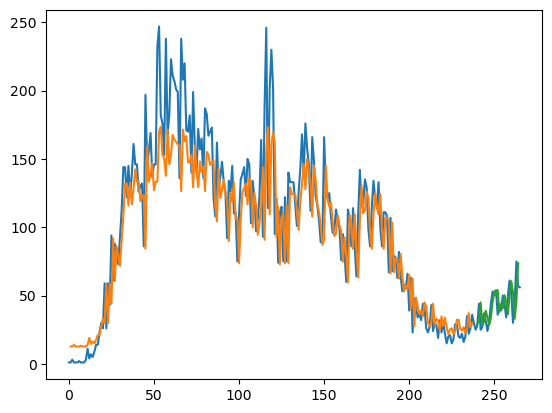

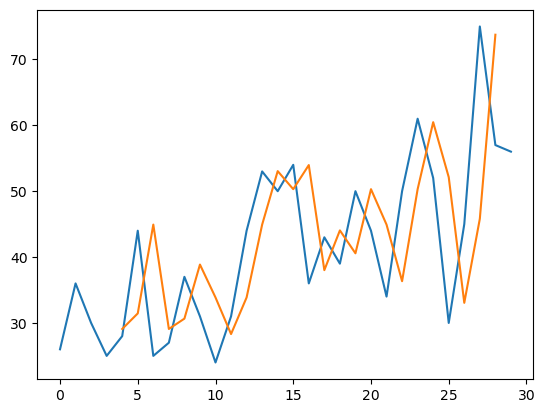

In [6]:
tf.random.set_seed(7)

# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 產生 (X, Y) 資料集, Y 是下一期的確診數(reshape into X=t and Y=t+1)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# 建立及訓練 GRU 模型
model = Sequential([
    SimpleRNN(64, return_sequences=True, input_shape=(1, look_back)),
    Dense(4, activation='elu'),
    SimpleRNN(64,return_sequences=True, activation='tanh'),
    Dense(1, activation='tanh'),
    LSTM(64,dropout=0.1,return_sequences=True, activation='elu'),
    Dense(4, activation='elu'),
    LSTM(64,dropout=0.1,return_sequences=True, activation='tanh'),
    Dense(1, activation='tanh')
])

#model.compile(loss='categorical_crossentropy', optimizer=opt)
#opt = keras.optimizers.Adam(learning_rate=0.0001)
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd ,metrics=['mse'])


model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="penghu_rnn+lstm_1000_4.keras",
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

model.summary()
history = model.fit(trainX, trainY,validation_data=(testX, testY), epochs=1000, batch_size=1, verbose=1,callbacks=[model_checkpoint_callback])
model.save('penghu_rnn+lstm_1000_4.h5')
# 預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict=trainPredict.reshape(-1, 1)
testPredict=testPredict.reshape(-1, 1)
# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#model = keras.models.load_model("jena_lstm.keras")
#print(f"Test MAE: {model.evaluate(testPredict)[1]:.2f}")

# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# 畫原始資料趨勢圖
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('penghu_rnn+lstm_1000_plot_4.png') 
plt.show()

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
days=len(testPredictPlot)
plt.plot(scaler.inverse_transform(dataset[days-30:,:]))
plt.plot(testPredictPlot[days-30:,:])
plt.savefig("penghu_rnn+lstm_1000_predict&real_4.png")
plt.show()